In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
import time
import pickle
import os
from math import log
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, ParameterGrid,StratifiedKFold, cross_val_score

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, brier_score_loss, f1_score, log_loss,auc,roc_curve,auc

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
#from sklearn.utils.fixes import signature

from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\UW\POS = EMI Scorecard Analysis")

In [19]:
##read datasets
df=pd.read_csv(os.getcwd()+r"\Data Files\AUG20 PSI.csv")

In [20]:
df.head()

,SKP_CREDIT_CASE,POS_AUG20_DND,POS_AUG20_VODAFONE,POS_AUG20_PAYU,POS_AUG20_GEO,POS_AUG20_INTERNAL,POS_AUG20_PRODUCT,POS_MAR20_CIBIL_LGBM,POS_AUG19_LADDER,POS_AUG20_AIRTEL,POS_DEC20_SNA,TIME_CREATION_DATE,PRODUCT_GROUP,POS_AUG20_GM
0,343116629,-2.630188,-3.131907,-0.026942,-0.228968,-1.297000,-2.372065,NaN,-2.587039,-0.1341,-2.428989,01-07-21,CD,0.057692
1,343098547,-2.630188,-3.131907,-0.026942,-0.228968,-2.337199,-2.512989,-3.46,NaN,NaN,NaN,01-07-21,POS=EMI,0.011107
2,343099233,-2.630188,-3.131907,-0.026942,-0.138913,-2.056760,-2.512989,NaN,-2.587039,NaN,NaN,01-07-21,POS=EMI,0.023223
3,343160730,-2.796292,-4.337277,-0.026942,0.032083,-2.058110,-2.580668,-3.46,NaN,0.0000,-2.319186,01-07-21,CD,0.003641
4,343152728,-2.458118,-3.393466,-0.026942,0.032083,-2.486750,-2.253606,NaN,-2.587039,0.0000,-2.879156,01-07-21,CD,0.011828


In [21]:
df["TIME_CREATION_DATE"] = pd.to_datetime(df["TIME_CREATION_DATE"], format = '%d-%m-%y')

In [22]:
df.PRODUCT_GROUP.value_counts()

CD         103481
POS=EMI     66186
Name: PRODUCT_GROUP, dtype: int64

In [23]:
df = df[df["TIME_CREATION_DATE"]<= pd.datetime(2021,7,15)]

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


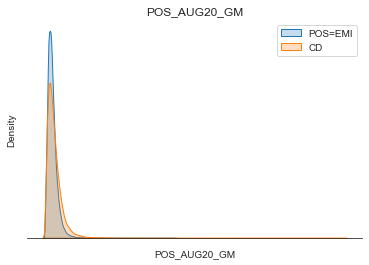

In [24]:
sns.set_style("white")

var = "POS_AUG20_GM"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

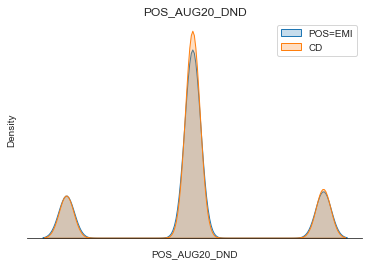

In [25]:
sns.set_style("white")

var = "POS_AUG20_DND"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

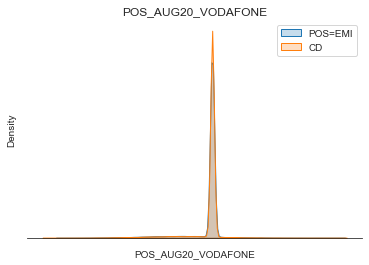

In [26]:
sns.set_style("white")

var = "POS_AUG20_VODAFONE"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

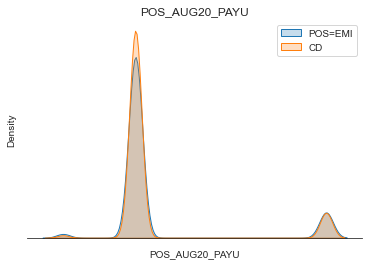

In [27]:
sns.set_style("white")

var = "POS_AUG20_PAYU"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

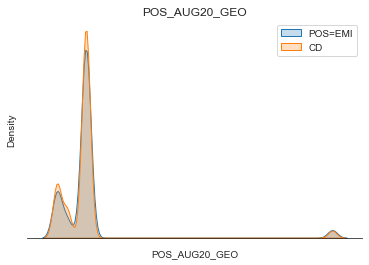

In [28]:
sns.set_style("white")

var = "POS_AUG20_GEO"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

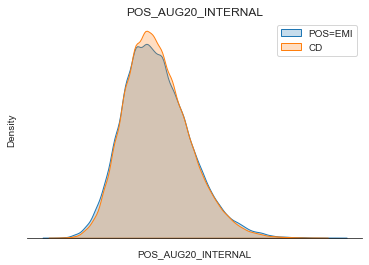

In [29]:
sns.set_style("white")

var = "POS_AUG20_INTERNAL"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


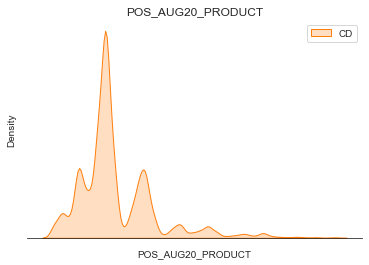

In [30]:
sns.set_style("white")

var = "POS_AUG20_PRODUCT"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

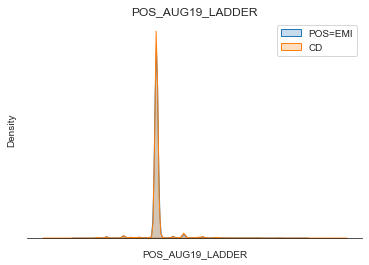

In [31]:
sns.set_style("white")

var = "POS_AUG19_LADDER"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

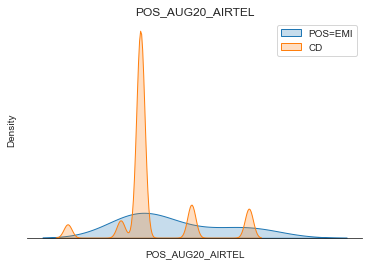

In [32]:
sns.set_style("white")

var = "POS_AUG20_AIRTEL"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

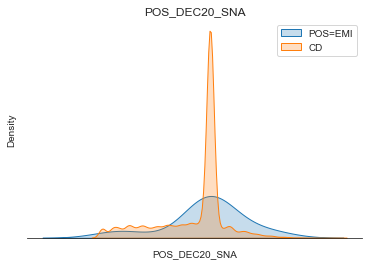

In [33]:
sns.set_style("white")

var = "POS_DEC20_SNA"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

# WO Product Pillar

In [4]:
##read datasets
df=pd.read_csv(os.getcwd()+r"\Data Files\WO Product.csv")

In [5]:
df.head()

,SKP_CREDIT_CASE,POS_MAR20_CIBIL_LGBM,POS_AUG19_LADDER,TIME_CREATION_DATE,PRODUCT_GROUP,SCORE_APSC_NOV18,SCORE_APSC_NOV18_NEW,POS_AUG20_GM,POS_AUG20_GM_WO_PRODUCT
0,343123022,-3.46,NaN,01-07-21,POS=EMI,0.029603,0.023367,0.017992,0.024500
1,343124501,NaN,-2.587039,01-07-21,POS=EMI,0.022556,0.022556,0.033466,NaN
2,343113966,NaN,-2.408654,01-07-21,POS=EMI,0.018805,0.014809,0.010779,NaN
3,343132975,NaN,-2.587039,01-07-21,CD,0.015470,0.015470,0.085085,0.076945
4,343148315,-3.46,NaN,01-07-21,CD,0.008492,0.008492,0.041904,0.054931


In [6]:
df["TIME_CREATION_DATE"] = pd.to_datetime(df["TIME_CREATION_DATE"], format = '%d-%m-%y')

In [7]:
df.PRODUCT_GROUP.value_counts()

CD         85106
POS=EMI    55834
Name: PRODUCT_GROUP, dtype: int64

In [8]:
df = df[df["TIME_CREATION_DATE"]<= pd.datetime(2021,7,15)]

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [10]:
df = df.dropna(subset = ["POS_MAR20_CIBIL_LGBM"])

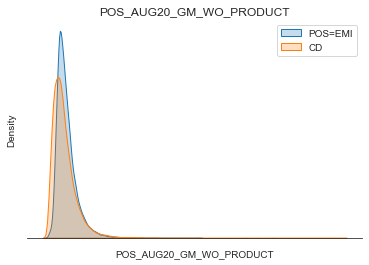

In [11]:
sns.set_style("white")

var = "POS_AUG20_GM_WO_PRODUCT"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)